# Bank Term Deposit Marketing Analysis

Key Takeways :
- A term deposit is a type of deposit account held at a financial institution where money is locked up   for some set period of time.
- Term deposits are usually short-term deposits with maturities ranging from one month to a few years.
- Typically, term deposits offer higher interest rates than traditional liquid savings accounts,       whereby customers can withdraw their money at any time.

### Business goal: 


Reducing marketing resources by identifying customers who would subscribe to term deposit 
and thereby direct marketing efforts to them.

## Using FLAML for Automating Machine Learning Process

FLAML is a lightweight open-source Python library that helps in finding out the best Machine Learning
model automatically, efficiently, and economically. It is fast that saves time and is also lightweight
in design.

In [101]:
pip install flaml


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing required libraries

In [103]:
from flaml import AutoML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import warnings

In [104]:
df=pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [105]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## EDA

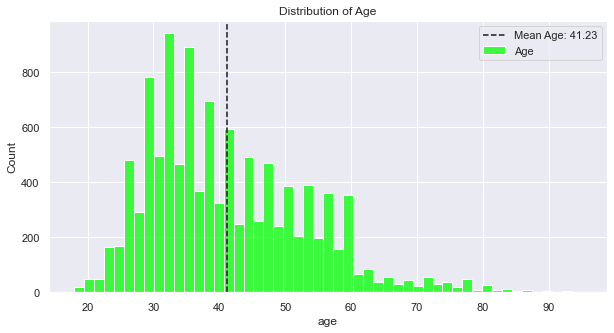

In [106]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['age'],color='Lime',label='Age')
plt.axvline(x=df['age'].mean(),color='k',linestyle ="--",label='Mean Age: {}'.format(round(df['age'].mean(),2)))
plt.legend()

plt.title('Distribution of Age')
plt.show()

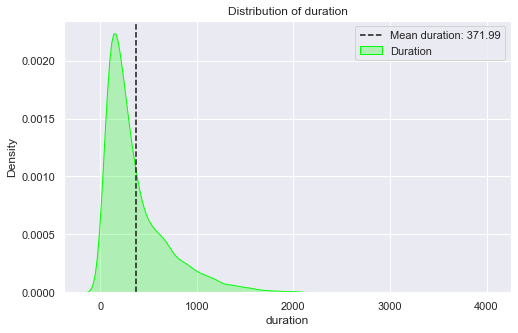

In [107]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['duration'],color='Lime',shade=True,label='Duration')
plt.axvline(x=df['duration'].mean(),color='k',linestyle ="--",label='Mean duration: {}'.format(round(df['duration'].mean(),2)))
plt.legend()
plt.title('Distribution of duration')
plt.show()

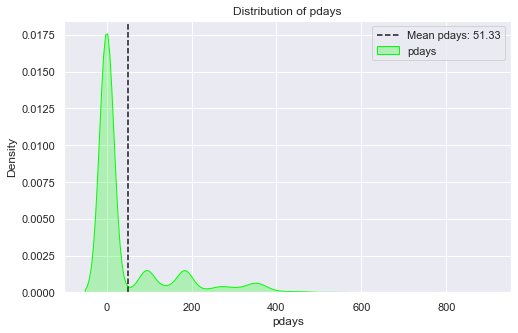

In [108]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['pdays'],color='Lime',shade=True,label='pdays')
plt.axvline(x=df['pdays'].mean(),color='k',linestyle ="--",label='Mean pdays: {}'.format(round(df['pdays'].mean(),2)))
plt.legend()
plt.title('Distribution of pdays')
plt.show()

In [109]:
fig=px.bar(df.job.value_counts().reset_index().rename(columns={'index':'Job','job':'Count'}),x='Job',y='Count',color='Job',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Job type of the Customers',font_family="Times New Roman",title_font_family="Times New Roman")

Insight📊:

- Management and Blue-collar Job type Clients are maximum in the bank
- There are very less number of student customers in the bank

In [110]:
fig=px.pie(df.marital.value_counts().reset_index().rename(columns={'index':'Marital-Status','marital':'Count'}),names='Marital-Status',values='Count',hole=0.5,template='plotly_white',color_discrete_sequence=['HotPink','LightSeaGreen','SlateBlue'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Marital-Status')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

Insight📊:

Most of the clients in the bank are Married - 56.9% and Single - 31.5%

In [111]:
fig=px.bar(df.education.value_counts().reset_index().rename(columns={'index':'Education','education':'Count'}),x='Education',y='Count',color='Education',text='Count',template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,legend_title_text='<b>Education',title_text='<b>Education of the customers',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()
fig=px.pie(df.education.value_counts().reset_index().rename(columns={'index':'Education','education':'Count'}),names='Education',values='Count',hole=0.5,template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Education')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

Insight📊:

Most of the customers in the bank are related to Secondary - 49.1% and Tertiary - 33% Category
only 13.4% of the clients are related to primary education category

In [112]:
fig=px.pie(df.contact.value_counts().reset_index().rename(columns={'index':'Contact','contact':'Count'}),names='Contact',values='Count',hole=0.5,template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Contact')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

Insight📊:

- Most of the customers in the bank are contacted through Cellular - 72%
- only 6.93% of the clients are contacted through telephone

In [113]:
fig=px.bar(df.month.value_counts().reset_index().rename(columns={'index':'Month','month':'Count'}),x='Month',y='Count',color='Month',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Last Contact Month of the year',font_family="Times New Roman",title_font_family="Times New Roman")

Insight📊:

- Most of the clients in the bank are contacted in the months of May, Jun, Jul and in Aug last year.
- very few of the clients are contacted in the months of Sep, Mar and in Dec

In [114]:
fig=px.bar(df.poutcome.value_counts().reset_index().rename(columns={'index':'Poutcome','poutcome':'Count'}),x='Poutcome',y='Count',color='Poutcome',text='Count',color_discrete_sequence=['grey','red','green','blue'],template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Outcome of previous marketing Campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

In [115]:
fig=px.pie(df.poutcome.value_counts().reset_index().rename(columns={'index':'Poutcome','poutcome':'Count'}),names='Poutcome',values='Count',hole=0.5,template='simple_white',color_discrete_sequence=['grey','red','blue','green'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Poutcome')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,title_text='<b>Outcome of previous marketing Campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(title_x=0.5,legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.show()

Insight📊:

- From the Outcomes of the previous marketing Campaign most of the results are Unknown ~ 74.6% and       Failure ~ 11% .
- Success rate is very less ~ 9.6%
  From the Analysis, on doing Marketing Campaigns there will be more Failure than Success.

In [116]:
fig=px.pie(df.groupby(['deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'}),names='deposit',values='Count',template='ggplot2',hole=0.8)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Deposit')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,title_text='<b>Term Deposits',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(title_x=0.5,legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.show()

Insight📊:

- From the Outcomes of the previous marketing Campaign 52.6% of the Clients are not subsribed for the   Term Deposits.
- only 47.4% are subsribed to the term deposits

In [117]:
a=df.groupby(['job'],as_index=False)['balance'].mean()
a['balance']=round(a['balance'],1)
fig=px.bar(a.sort_values(by='balance',ascending=False),x='job',y='balance',text='balance',color='job',template='ggplot2')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Average balance of the clients by their job type',legend_title_text='Job Type',font_family="Times New Roman",title_font_family="Times New Roman")

In [118]:
fig=px.box(df,x='job',y='age',color='job',template='simple_white',title='<b>Distribution of age based on job type')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Job type")

In [119]:
fig=px.box(df,x='marital',y='age',color='marital',template='simple_white',title='<b>Distribution of age based on Marital Status',color_discrete_sequence=['HotPink','LightSeaGreen','SlateBlue'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Marital Status")
fig.show()

Insight📊:

- The median age of the married people is 43 and for the divorced people is 46.
- The median age of the people who are single is 31

In [120]:
fig=px.box(df,x='education',y='age',color='education',template='simple_white',title='<b>Distribution of age based on Education Level')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Education Level")
fig.show()

Insight📊:

- The median age of the primary education level of the clients is 47 and the secondary education level   of the clients is 38.
- The median age of the clients whose Education level is unknown is 45
- The median age of the clients whose Education level Tertiary is 36

In [121]:
fig=px.box(df,x='loan',y='age',color='loan',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'],title='<b>Distribution of age based on Personal Loan Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Personal Loan")
fig.show()

Insight📊:

- The median age of the clients who subscribed and not subscribed for the personal loan is almost same.

In [122]:
fig=px.box(df,x='deposit',y='age',color='deposit',template='simple_white',color_discrete_sequence=['DeepSkyBlue','LightCoral'],title='<b>Distribution of age based on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

Insight📊:

- The median age of the clients who subscribed and not subscribed for the term deposit is almost same.

In [123]:
fig=px.box(df,x='deposit',y='duration',color='deposit',template='simple_white',color_discrete_sequence=['YellowGreen','LightCoral'],title='<b>Effect of Duration on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

Insight📊:

- The median duration of the clients who subscribed for the term deposit is 426.
- The median duration of the clients who are not subscribed for the term deposit is 163.
- It is clear, that the duration is highly affecting the target variable.

In [124]:
df['Duration']=df['duration'].apply(lambda x: 'Above_Average_Duration' if x>=df['duration'].mean() else 'Below_Average_Duration')
a=df.groupby(['Duration','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Duration')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Duration',y='Count',text='percent',color='deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Duration on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average duration and below average duration</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')
fig.show()

insight📊:

- if the duration is above average then 77.4 % of clients are subscribed to term deposits and 22.6 % are not subscribed
- if the duration is below average then 31.6 % of clients are subscribed to term deposits and 68.4 % are not subscribed

In [125]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Duration
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,Above_Average_Duration
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,Above_Average_Duration
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,Above_Average_Duration
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,Above_Average_Duration
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,Above_Average_Duration


In [126]:
''' shape of data '''
df.shape

(11162, 18)

In [127]:
''' checking null values '''
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
Duration     0
dtype: int64

In [128]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
 17  Duration   11162 non-null  object
dtypes: int64(7), object(11)
memory usage: 1.5+ MB


In [129]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


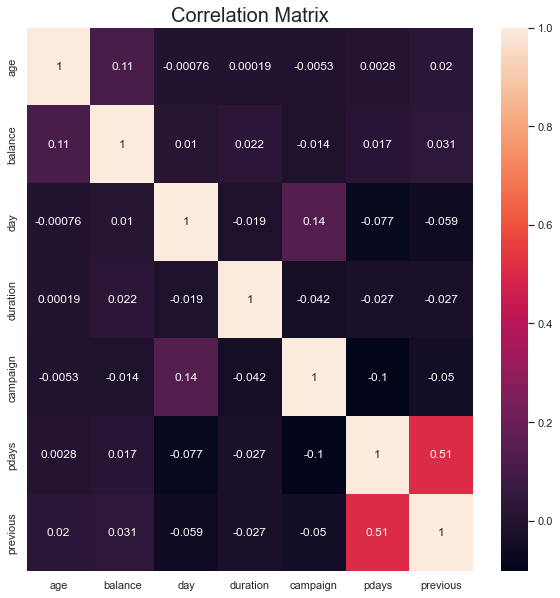

In [130]:
''' correlation matrix '''
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20);

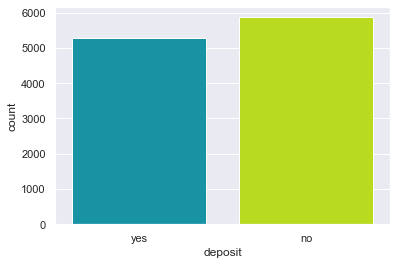

no     5873
yes    5289
Name: deposit, dtype: int64

In [131]:
# Check if any imbalanced classes in dataset
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=df.deposit,palette='nipy_spectral')
plt.show()

df["deposit"].value_counts()

In [132]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Duration
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,Above_Average_Duration


In [133]:
df.drop('Duration', axis = 1,inplace=True)  

In [134]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


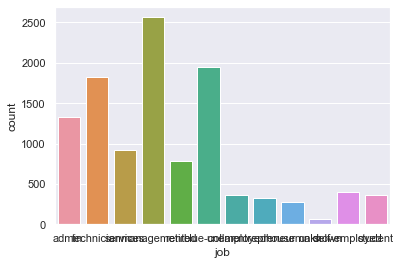

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [135]:
#feature Salary

sns.countplot(x="job", data=df)
plt.show()
df["job"].value_counts()

In [136]:
#finding columns that are not of type float or int
colums_to_convert = df.select_dtypes(object).columns   
colums_to_convert

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [137]:
#performing hotcoding using the get_dummies method of pandas libraries
data = pd.get_dummies(df, columns = colums_to_convert, drop_first=True)      
data.head(5)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


In [138]:
data.rename(columns = {'deposit_yes':'deposit'}, inplace = True)

In [139]:
data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,59,2343,5,1042,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11158,39,733,16,83,4,-1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
11159,32,29,19,156,2,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11160,43,0,8,9,2,172,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Split Dataset in Train and Test

In [140]:
# splitting dependent and independent variables

X=data.drop(labels='deposit',axis=1)
y=data['deposit']


In [141]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: uint8

In [142]:
# split data set in to test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [143]:
# AUTO ML settings
# create the Automl instance and define the settings.

automl = AutoML()
automl_settings = {
    "time_budget": 10,  # in seconds
    "metric": 'accuracy',
    "task": 'classification'
}

In [144]:
# split the load of the data and fit it into the model. Finally, we will also predict using 
# the model and find the best model.

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)
print(automl.predict_proba(X_train).shape)
# Export the best model
print(automl.model)


[flaml.automl.logger: 05-12 18:55:55] {1693} INFO - task = classification
[flaml.automl.logger: 05-12 18:55:55] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 05-12 18:55:55] {1703} INFO - Evaluation method: holdout
[flaml.automl.logger: 05-12 18:55:55] {1801} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 05-12 18:55:55] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 05-12 18:55:55] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-12 18:55:55] {2347} INFO - Estimated sufficient time budget=577s. Estimated necessary time budget=13s.
[flaml.automl.logger: 05-12 18:55:55] {2394} INFO -  at 0.3s,	estimator lgbm's best error=0.2268,	best estimator lgbm's best error=0.2268
[flaml.automl.logger: 05-12 18:55:55] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-12 18:55:55] {2394} INFO -  at 0.3s,	estimator lgbm's best er

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[flaml.automl.logger: 05-12 18:55:55] {2394} INFO -  at 0.6s,	estimator lgbm's best error=0.1587,	best estimator lgbm's best error=0.1587
[flaml.automl.logger: 05-12 18:55:55] {2221} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 05-12 18:55:55] {2394} INFO -  at 0.6s,	estimator lgbm's best error=0.1531,	best estimator lgbm's best error=0.1531
[flaml.automl.logger: 05-12 18:55:55] {2221} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 05-12 18:55:55] {2394} INFO -  at 0.7s,	estimator lgbm's best error=0.1531,	best estimator lgbm's best error=0.1531
[flaml.automl.logger: 05-12 18:55:55] {2221} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 05-12 18:55:55] {2394} INFO -  at 0.8s,	estimator lgbm's best error=0.1531,	best estimator lgbm's best error=0.1531
[flaml.automl.logger: 05-12 18:55:55] {2221} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 05-12 18:55:56] {2394} INFO -  at 0.8s,	estimator lgbm's best error=0.1464,	best e

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[flaml.automl.logger: 05-12 18:55:56] {2394} INFO -  at 1.1s,	estimator extra_tree's best error=0.3061,	best estimator lgbm's best error=0.1464
[flaml.automl.logger: 05-12 18:55:56] {2221} INFO - iteration 13, current learner rf
[flaml.automl.logger: 05-12 18:55:56] {2394} INFO -  at 1.2s,	estimator rf's best error=0.2022,	best estimator lgbm's best error=0.1464
[flaml.automl.logger: 05-12 18:55:56] {2221} INFO - iteration 14, current learner rf
[flaml.automl.logger: 05-12 18:55:56] {2394} INFO -  at 1.3s,	estimator rf's best error=0.1821,	best estimator lgbm's best error=0.1464
[flaml.automl.logger: 05-12 18:55:56] {2221} INFO - iteration 15, current learner rf
[flaml.automl.logger: 05-12 18:55:56] {2394} INFO -  at 1.4s,	estimator rf's best error=0.1821,	best estimator lgbm's best error=0.1464
[flaml.automl.logger: 05-12 18:55:56] {2221} INFO - iteration 16, current learner lgbm
[flaml.automl.logger: 05-12 18:55:56] {2394} INFO -  at 1.4s,	estimator lgbm's best error=0.1464,	best est

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[flaml.automl.logger: 05-12 18:55:58] {2394} INFO -  at 3.5s,	estimator lgbm's best error=0.1318,	best estimator lgbm's best error=0.1318
[flaml.automl.logger: 05-12 18:55:58] {2221} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 05-12 18:55:59] {2394} INFO -  at 3.9s,	estimator lgbm's best error=0.1318,	best estimator lgbm's best error=0.1318
[flaml.automl.logger: 05-12 18:55:59] {2221} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 05-12 18:55:59] {2394} INFO -  at 4.0s,	estimator lgbm's best error=0.1318,	best estimator lgbm's best error=0.1318
[flaml.automl.logger: 05-12 18:55:59] {2221} INFO - iteration 33, current learner extra_tree
[flaml.automl.logger: 05-12 18:55:59] {2394} INFO -  at 4.1s,	estimator extra_tree's best error=0.2201,	best estimator lgbm's best error=0.1318
[flaml.automl.logger: 05-12 18:55:59] {2221} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 05-12 18:55:59] {2394} INFO -  at 4.2s,	estimator lgbm's best erro

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[flaml.automl.logger: 05-12 18:56:00] {2394} INFO -  at 4.9s,	estimator lgbm's best error=0.1307,	best estimator lgbm's best error=0.1307
[flaml.automl.logger: 05-12 18:56:00] {2221} INFO - iteration 40, current learner extra_tree
[flaml.automl.logger: 05-12 18:56:00] {2394} INFO -  at 5.1s,	estimator extra_tree's best error=0.2078,	best estimator lgbm's best error=0.1307
[flaml.automl.logger: 05-12 18:56:00] {2221} INFO - iteration 41, current learner extra_tree
[flaml.automl.logger: 05-12 18:56:00] {2394} INFO -  at 5.1s,	estimator extra_tree's best error=0.2078,	best estimator lgbm's best error=0.1307
[flaml.automl.logger: 05-12 18:56:00] {2221} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 05-12 18:56:00] {2394} INFO -  at 5.6s,	estimator lgbm's best error=0.1307,	best estimator lgbm's best error=0.1307
[flaml.automl.logger: 05-12 18:56:00] {2221} INFO - iteration 43, current learner rf
[flaml.automl.logger: 05-12 18:56:00] {2394} INFO -  at 5.8s,	estimator rf's b

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[flaml.automl.logger: 05-12 18:56:01] {2394} INFO -  at 6.7s,	estimator lgbm's best error=0.1307,	best estimator lgbm's best error=0.1307
[flaml.automl.logger: 05-12 18:56:01] {2221} INFO - iteration 49, current learner xgboost
[flaml.automl.logger: 05-12 18:56:01] {2394} INFO -  at 6.8s,	estimator xgboost's best error=0.1922,	best estimator lgbm's best error=0.1307
[flaml.automl.logger: 05-12 18:56:01] {2221} INFO - iteration 50, current learner xgboost
[flaml.automl.logger: 05-12 18:56:02] {2394} INFO -  at 6.9s,	estimator xgboost's best error=0.1911,	best estimator lgbm's best error=0.1307
[flaml.automl.logger: 05-12 18:56:02] {2221} INFO - iteration 51, current learner lgbm


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[flaml.automl.logger: 05-12 18:56:02] {2394} INFO -  at 7.4s,	estimator lgbm's best error=0.1274,	best estimator lgbm's best error=0.1274
[flaml.automl.logger: 05-12 18:56:02] {2221} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 05-12 18:56:03] {2394} INFO -  at 8.6s,	estimator lgbm's best error=0.1274,	best estimator lgbm's best error=0.1274
[flaml.automl.logger: 05-12 18:56:03] {2221} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 05-12 18:56:04] {2394} INFO -  at 8.9s,	estimator lgbm's best error=0.1274,	best estimator lgbm's best error=0.1274
[flaml.automl.logger: 05-12 18:56:04] {2221} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 05-12 18:56:05] {2394} INFO -  at 10.2s,	estimator lgbm's best error=0.1274,	best estimator lgbm's best error=0.1274
[flaml.automl.logger: 05-12 18:56:05] {2630} INFO - retrain lgbm for 0.5s
[flaml.automl.logger: 05-12 18:56:05] {2633} INFO - retrained model: LGBMClassifier(colsample_bytree=0.310247153

In [145]:
#Best model and metric
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 139, 'num_leaves': 73, 'min_child_samples': 4, 'learning_rate': 0.13922885689646242, 'log_max_bin': 7, 'colsample_bytree': 0.3102471539831382, 'reg_alpha': 0.003166610865333638, 'reg_lambda': 0.005846787128744264}
Best accuracy on validation data: 0.8726
Training duration of best run: 0.5234 s


In [146]:
automl.score(X_train,y_train)

0.9782730428939411

In [147]:
automl.score(X_test,y_test)

0.8446036721898791

In [148]:
#confusion metric

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,automl.predict(X_test))
cm

array([[1007,  198],
       [ 149,  879]], dtype=int64)

Text(30.5, 0.5, 'Actual Values')

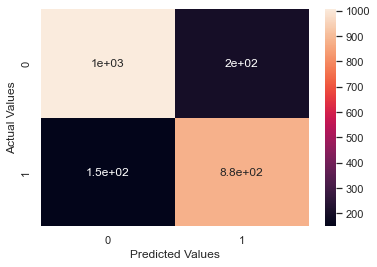

In [149]:
# ploting Confusion matrix

from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel("Actual Values")

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1205
           1       0.82      0.86      0.84      1028

    accuracy                           0.84      2233
   macro avg       0.84      0.85      0.84      2233
weighted avg       0.85      0.84      0.84      2233



In [151]:
'''pickle and save the automl object'''
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)
'''load pickled automl object'''
with open('automl.pkl', 'rb') as f:
    automl = pickle.load(f)